In [2]:
import pandas as pd
import requests
from matplotlib import pyplot as plt
import numpy as np

In [37]:
url_link=('https://api.cryptonator.com/api/full/btc-usd')  #save the link to a variable "url_link"

In [38]:
markets=requests.get(url_link).json()['ticker']['markets']  #EXTRACTING THE MARKETS OF THE GIVEN COIN FROM DATA

In [39]:
data=pd.DataFrame(markets)                                 #MAKING DATA FRAME OF MARKETS

In [40]:
data                                                       #DISPLAYING THE DATA FRAME

,market,price,volume
0,BitFinex,9736.90000000,83877.239929
1,Bitstamp,9762.82000000,31069.536792
2,Bittrex,9708.06649900,7679.702908
3,C-Cex,10569.98700000,3.786957
4,Cex.io,10062.80000000,2100.939850
5,Exmo,10338.60000000,1421.772640
6,Hitbtc,10104.43000000,5782.720000
7,Kraken,9760.00000000,16176.867612
8,Livecoin,10154.00002000,898.601866
9,Poloniex,9712.95751255,6322.836408


In [41]:
labels=np.array(data['market'].values)                   #STORING THE MARKET NAMES IN LABELS ADDING .VALUES AT THE END TO GET VALUES  
prices=np.array((data['price']).values,dtype='float64')  #AND CONVERTING THE IN ARRAYS USING NUMPY OF DATA TYPE FLOAT64
volumes=np.array(data['volume'].values,dtype='float64')
labels

array(['BitFinex', 'Bitstamp', 'Bittrex', 'C-Cex', 'Cex.io', 'Exmo',
       'Hitbtc', 'Kraken', 'Livecoin', 'Poloniex', 'wexnz', 'YoBit'],
      dtype=object)

In [42]:
prices

array([ 9736.9       ,  9762.82      ,  9708.066499  , 10569.987     ,
       10062.8       , 10338.6       , 10104.43      ,  9760.        ,
       10154.00002   ,  9712.95751255,  9800.        , 10488.99999999])

In [43]:
volumes

array([8.38772399e+04, 3.10695368e+04, 7.67970291e+03, 3.78695710e+00,
       2.10093985e+03, 1.42177264e+03, 5.78272000e+03, 1.61768676e+04,
       8.98601866e+02, 6.32283641e+03, 1.30254746e+03, 1.77867833e+02])

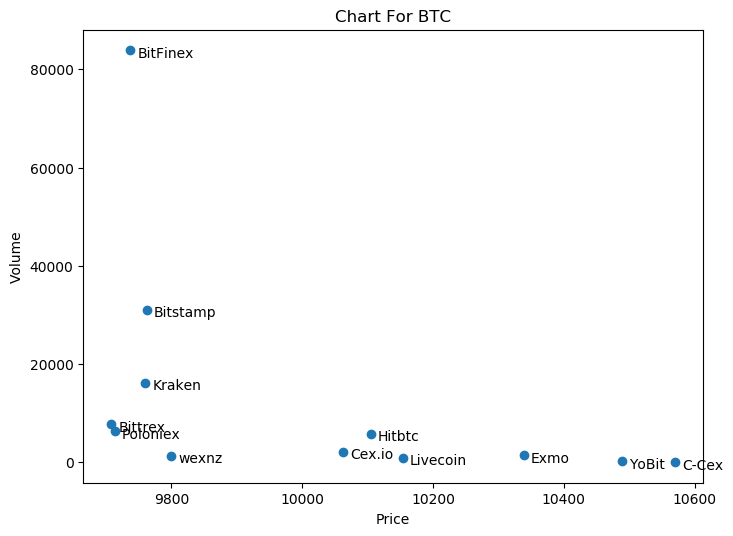

In [44]:
plt.figure(num=None, figsize=(8, 6), dpi=100)     #ADJUSTING THE DIMESSNSION OF CHART
plt.scatter(prices,volumes)                       #PLOTTING SCATTER PLOT 

for label,price,volume in zip(labels,prices,volumes):  #NOW LABELLING EACH VALUE BY ITERATION THROUGH FOR LOOP
    plt.annotate(label,
                xy=(price,volume),
                xytext=(5,-5),
                textcoords='offset points',fontsize=10)

plt.xlabel('Price')
plt.ylabel('Volume')
plt.title('Chart For BTC')
plt.show()

In [45]:
highest_price=np.max(prices)                #FINDING THE MAXIMUM VALUE IN THE PRICE COULMN
lowest_price=np.min(prices)                 #FINDING THE MINIMUM VALUE IN THE PRICE COULMN
highest_market=labels[np.argmax(prices)]    #ARGMAX WILL GIVE THE INDEX OF LARGEST VALUE AND THEN IT WILL STORED
lowest_market=labels[np.argmin(prices)]     #ARGMIN WILL GIVE THE INDEX OF SMALLEST VALUE AND THEN IT WILL STORED

In [46]:
highest_market

'C-Cex'

In [47]:
highest_price

10569.987

In [48]:
lowest_market

'Bittrex'

In [49]:
lowest_price

9708.066499

In [50]:
difference=np.float64(highest_price)-np.float64(lowest_price)   #IT WILL GIVE THE DIFFERENCE OR THE PROFIT

In [51]:
difference

861.9205009999987

In [52]:
#    IT WILL BE GREAT TO DESIGN A FUNCTION FOR THE PROGRAM INSTEAD OF WRITING IT IN INDIVIDUAL CELLS
#    SUMMING ALL THE ABOVE CODE IN THE ARBITRAGE FUNCTION

Enter Coin Symbol: ltc


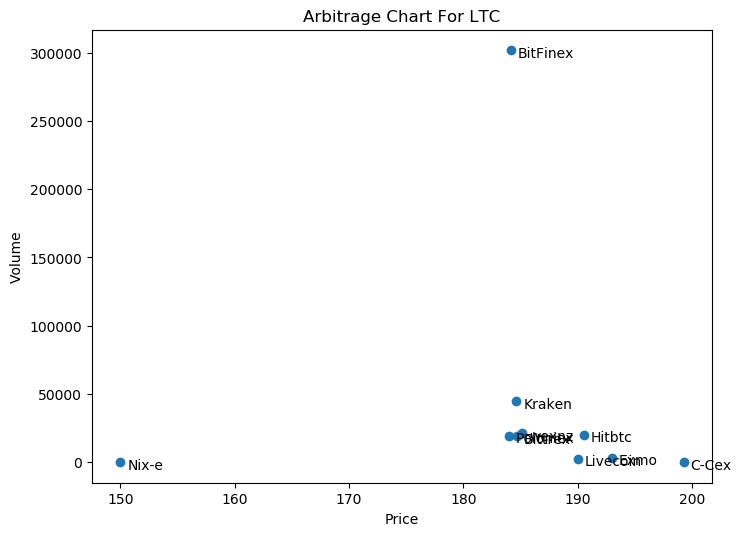

*You can buy LTC from Nix-e at 150.0 dollar
*And can sell at C-Cex at 199.2799999 dollar
*And can get a profit of  49.27999990000001 at a percentage of 32.853333266666674


In [16]:
def Arbitrage_of_Coin():
    coin_symbol=input("Enter Coin Symbol: ").lower()
    
    url_link=('https://api.cryptonator.com/api/full/{}-usd'.format(coin_symbol))
    try:
        markets=requests.get(url_link).json()['ticker']['markets']
    except (KeyError,ValueError,TypeError):
        print("Data Not not found")
        print('Enter Correct Symbol')
        Arbitrage_of_Coin()
    
    data=pd.DataFrame(markets)
    labels=np.array(data['market'].values)
    prices=np.array((data['price']).values,dtype='float64')
    volumes=np.array(data['volume'].values,dtype='float64')
    plt.figure(num=None, figsize=(8, 6), dpi=100)
    plt.scatter(prices,volumes)

    for label,price,volume in zip(labels,prices,volumes):
        plt.annotate(label,
                    xy=(price,volume),
                    xytext=(5,-5),
                    textcoords='offset points',fontsize=10)
    plt.xlabel('Price')
    plt.ylabel('Volume')
    plt.title('Arbitrage Chart For {}'.format(coin_symbol.upper()))
    plt.show()
    highest_price=np.max(prices)
    lowest_price=np.min(prices)
    highest_market=labels[np.argmax(prices)]
    lowest_market=labels[np.argmin(prices)]
    difference=np.float64(highest_price)-np.float64(lowest_price)
    percentage=(difference/lowest_price)*100
    print('*You can buy {} from {} at {} dollar'.format(coin_symbol.upper(),lowest_market,lowest_price))
    print('*And can sell at {} at {} dollar'.format(highest_market,highest_price))
    print('*And can get a profit of ',str(difference)+' at a percentage of',str(percentage))
Arbitrage_of_Coin()